# Problem Statement:

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.



In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

#Importing all the necessary libraries including classification and Regression.

In [42]:
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

Loading the dataset from the github directly. 

In [43]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.500,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.000,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.200,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.000,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.000,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.000,23.7689,68.6447,Coal,Oil,NaN,NaN,2005.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,NaN,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.000,10.4547,77.0078,Hydro,NaN,NaN,NaN,1970.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,157.558250,152.195200,61.421350,89.629600,48.327150,NaN,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.000,32.2258,77.2070,Hydro,NaN,NaN,NaN,2010.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,674.391100,721.335200,675.724400,679.594950,579.318850,NaN,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.000,16.3300,75.8863,Hydro,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,480.594950,144.434200,402.029750,439.372100,406.377900,NaN,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.000,23.1642,81.6373,Coal,Oil,NaN,NaN,2008.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,1887.904000,1643.046000,1338.093000,1563.457000,1487.880000,NaN,Central Electricity Authority,NaN


Our goal is to predict 2 labels primary_fuel and capacity_mw.

Values present in the column primary_fuel are categorical data in that column so we can consider it as our label which will be termed as a Classification problem!

Similarly, values present in the column capacity_mw are continous data so considering it as our label, it will be termed as a Regression problem!


We will perform the analysis on entire dataset, after that we will process the information accordingly to bifurcate the inputs for a Classification model and a Regression model.

# Exploratory Data Analysis (EDA)

In [44]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [45]:
df.shape

(907, 27)

From the code we can see that our dataset has 907 rows and 27 columns.

In [46]:
df.isnull().sum()
#checking if there is any null values in the datasets

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

We can see that there are missing values in many columns and in few columns all the 908 rows empty that will need to be removed since it provides no insights.

There are few columns which have more than half values are missing so we can delete it.  

In [47]:
df.drop(["other_fuel1", "other_fuel2", "other_fuel3", "owner", "wepp_id", "generation_gwh_2013",
        "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016", "generation_gwh_2017",
        "generation_data_source", "estimated_generation_gwh"], axis=1, inplace=True)

In [48]:
df.shape
#rechecking the shape of dataset

(907, 15)

Now we can see that dataset has 907 rows and 15 columns.

In [49]:
df.nunique().to_frame("Unique Values")
#checking the unique values

,Unique Values
country,1
country_long,1
name,907
gppd_idnr,907
capacity_mw,361
latitude,836
longitude,827
primary_fuel,8
commissioning_year,73
source,191


We can see that few columns has single unique values and few columns has all unique values so we can drop all such values which does not provide any insight or valueable information 

In [50]:
df.drop(["country", "country_long", "year_of_capacity_data", "name", "gppd_idnr", "url"], axis=1, inplace=True)

we have removed 6 columns which does not provides any useful info

In [51]:
print(df.shape)

(907, 9)


In [52]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2018,generation_gwh_2019
0,2.500,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN
1,98.000,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN
2,39.200,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN
3,135.000,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,626.239128,NaN
4,1800.000,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,7279.000000,NaN
5,250.000,23.7689,68.6447,Coal,2005.0,Central Electricity Authority,WRI,976.655000,NaN
6,60.000,10.4547,77.0078,Hydro,1970.0,Central Electricity Authority,WRI,48.327150,NaN
7,192.000,32.2258,77.2070,Hydro,2010.0,Central Electricity Authority,WRI,579.318850,NaN
8,290.000,16.3300,75.8863,Hydro,2004.0,Central Electricity Authority,WRI,406.377900,NaN
9,210.000,23.1642,81.6373,Coal,2008.0,Central Electricity Authority,WRI,1487.880000,NaN


Now we have our new dataset has 908 rows and 7 columns

In [53]:
df.isna().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64

As we can see we still have missing values present in our dataset columns that will need to be treated.

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             861 non-null    float64
 2   longitude            861 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   527 non-null    float64
 5   source               907 non-null    object 
 6   geolocation_source   888 non-null    object 
 7   generation_gwh_2018  448 non-null    float64
 8   generation_gwh_2019  0 non-null      float64
dtypes: float64(6), object(3)
memory usage: 53.2+ KB


We can see that out of 9 columns 6 are numerical data values and 3 are object data values so we will need to seperate these datas.

In [56]:
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object_datatype.append(x)
print(f"Object Data Type Columns are: ", object_datatype)
# serperating list of object data type column names

Object Data Type Columns are:  ['primary_fuel', 'source', 'geolocation_source']


In [57]:
float_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64':
        float_datatype.append(x)
print(f"Float Data Type Columns are: ", float_datatype)
# serperating the list of float data type column names

Float Data Type Columns are:  ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2018', 'generation_gwh_2019']


Now we will need to fill the missing values in object and float data values

In [58]:
df["latitude"].fillna(df["latitude"].mean(),inplace=True)
df["longitude"].fillna(df["longitude"].mean(),inplace=True)

df["commissioning_year"].fillna(df["commissioning_year"].mode()[0],inplace=True)
df["geolocation_source"].fillna(df["geolocation_source"].mode()[0],inplace=True)

Lets check if there is any missing values 

In [59]:
df.isna().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
source                   0
geolocation_source       0
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64

In [60]:
for col in object_datatype:
    print(col)
    print(df[col].value_counts())
    print("="*120)

primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64
source
Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
Maharashtra State Power Generation Co Ltd (MAHAGENCO)            4
Reliance Power Ltd                                               4
Acc Acc ltd                                                      4
Jk Cement ltd                                                    4
Rajasthan Renewable Energy Corporation Limited (RREC)            4
Shri Ssk ltd                                                     3
PEDA                                                             3
Solairedirect          

# Visualization : 

Lets pring the columns present in the filtered dataset

In [61]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2018', 'generation_gwh_2019'],
      dtype='object')

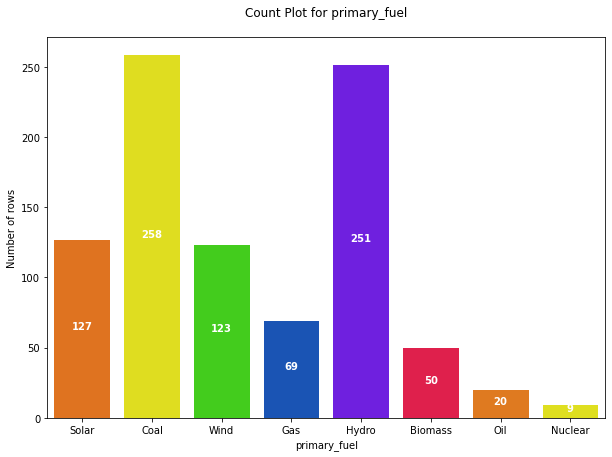

In [62]:
try:
    plt.figure(figsize=(10,7))
    col_name = 'primary_fuel'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

From count plot for "primary_fuel" column we can see that the highest number of values are covered by coal and hydro fuel types then comes solar and wind. Finally we see that gas, biomass, oil and nuclear have very low data counts.

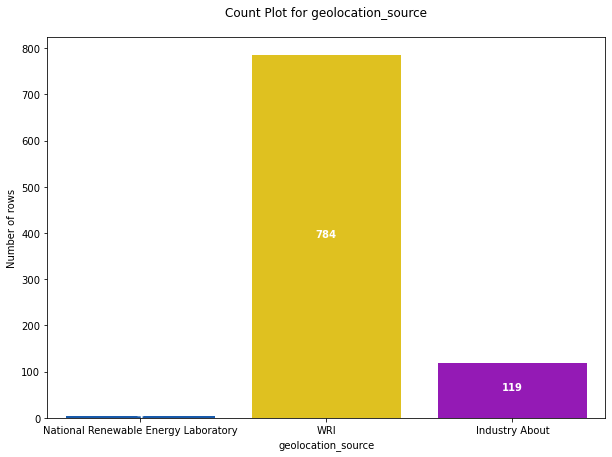

In [63]:
try:
    plt.figure(figsize=(10,7))
    col_name = 'geolocation_source'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

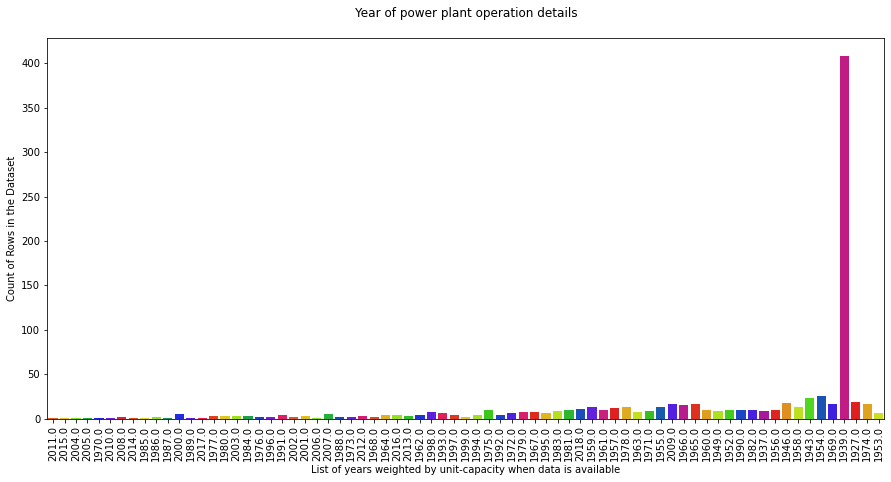

In [64]:
plt.figure(figsize=(15,7))
values = list(df['commissioning_year'].unique())
diag = sns.countplot(df["commissioning_year"], palette="prism")
diag.set_xticklabels(labels=values, rotation=90)
plt.title("Year of power plant operation details\n")
plt.xlabel("List of years weighted by unit-capacity when data is available")
plt.ylabel("Count of Rows in the Dataset")
plt.show()

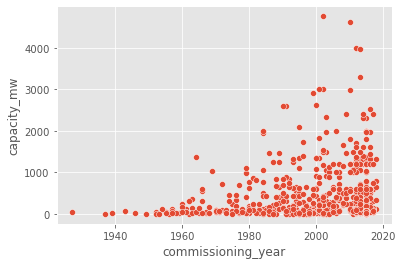

In [65]:
plt.style.use('ggplot')
sns.scatterplot(x = "commissioning_year", y = "capacity_mw", data = df)
plt.show()

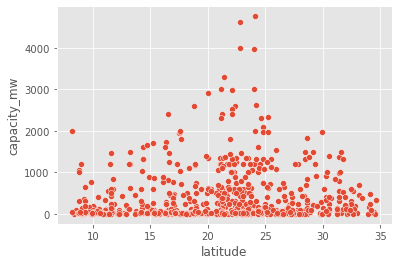

In [66]:
sns.scatterplot(x = "latitude", y = "capacity_mw", data = df)
plt.show()

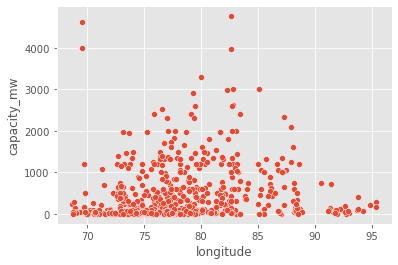

In [67]:
sns.scatterplot(x = "longitude", y = "capacity_mw", data = df)
plt.show()

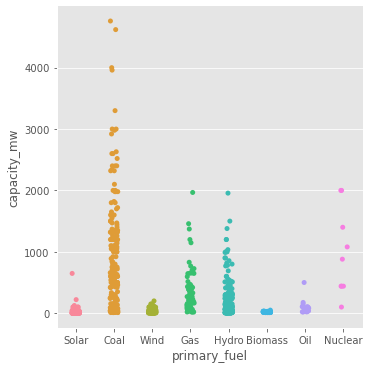

In [68]:
plt.style.use('seaborn-pastel')
sns.catplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()

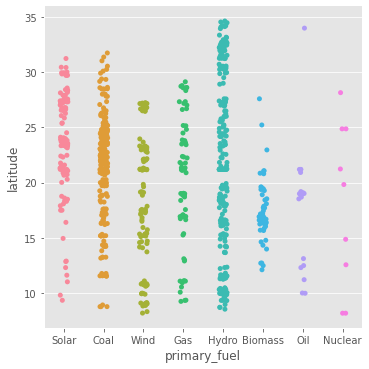

In [69]:
sns.catplot(x = "primary_fuel", y = "latitude", data = df)
plt.show()

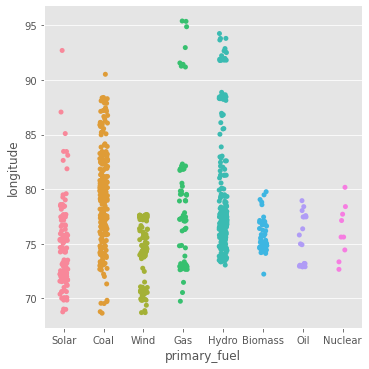

In [71]:
sns.catplot(x = "primary_fuel", y = "longitude", data = df)
plt.show()

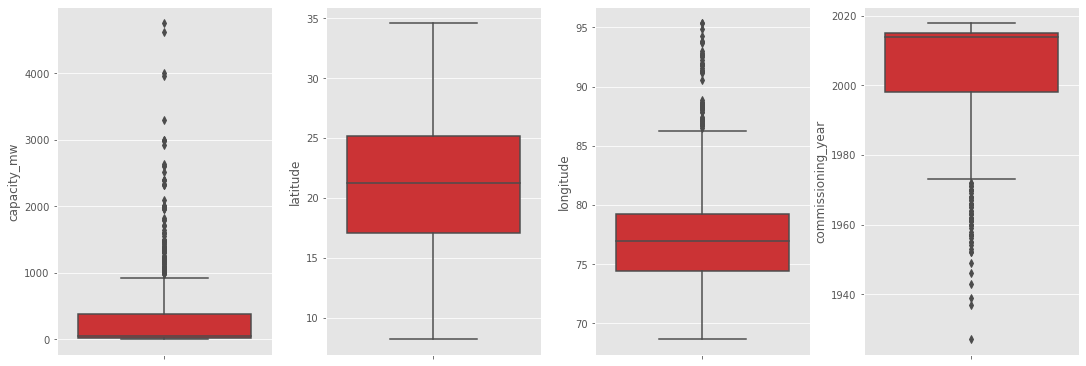

In [72]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[float_datatype].items():
#     print(col,value)
    if index<4:
        sns.boxplot(y=col, data=df, ax=ax[index], palette="Set1")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

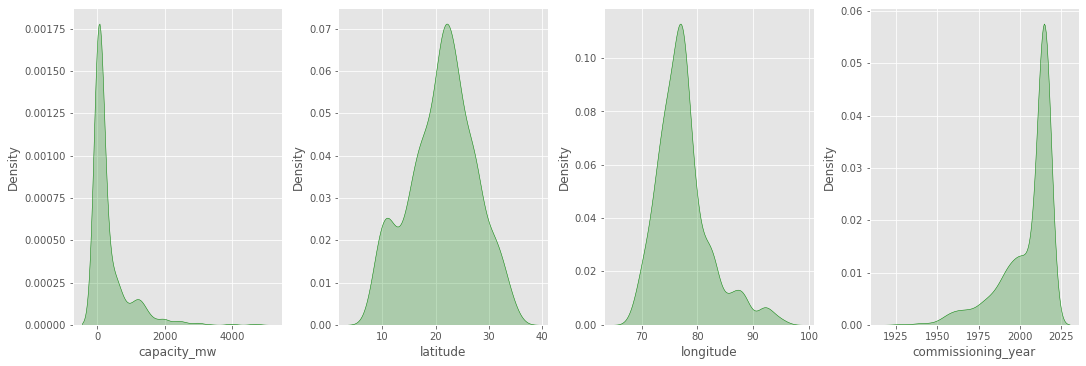

In [73]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[float_datatype].items():
    if index<4:
        sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

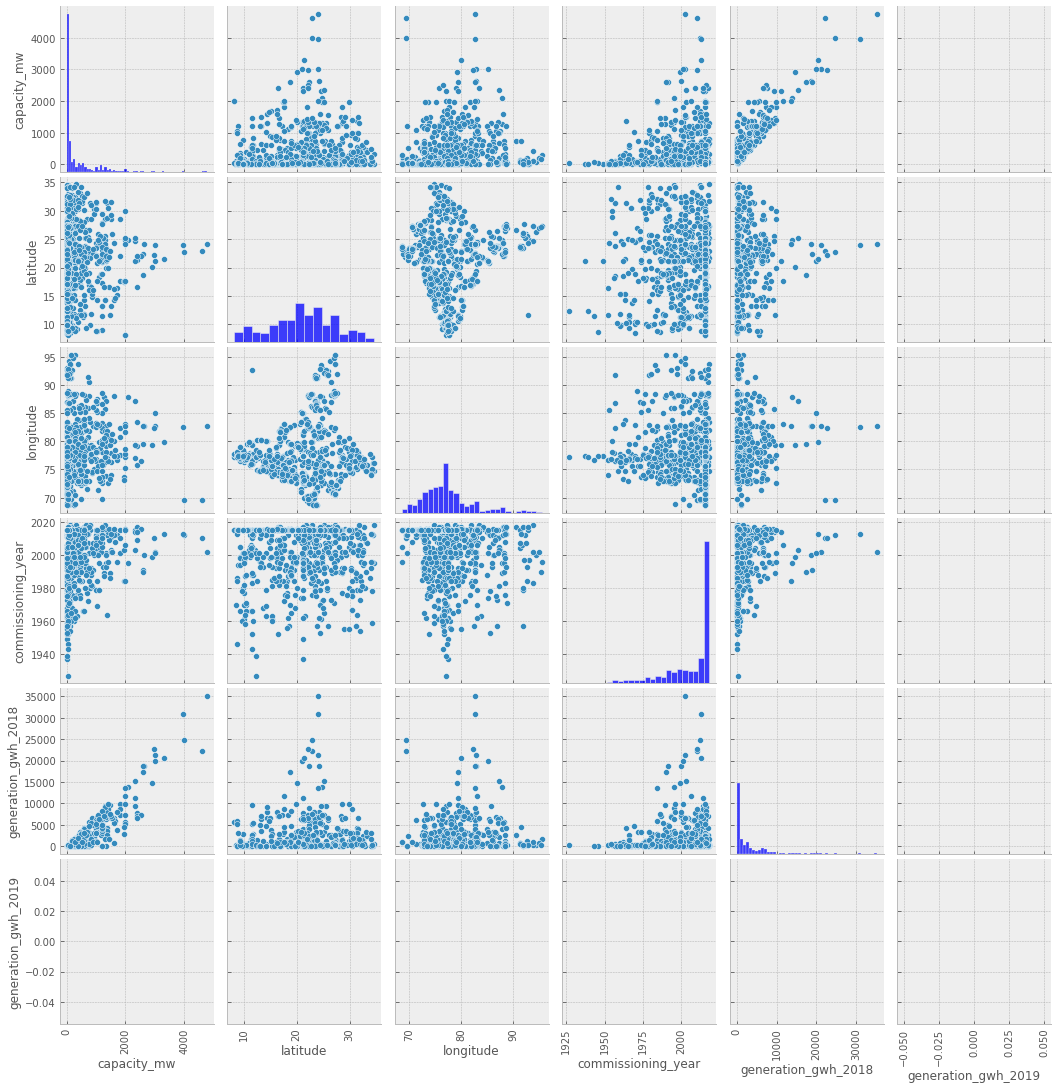

In [74]:
plt.style.use('bmh')
g = sns.pairplot(df)
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

From the above pair plot we can see the data distribution amongst the numerical data type columns.

# Encoding all the object datatype columns

In [77]:
# Label Encoder

le = LabelEncoder()
df["primary_fuel"] = le.fit_transform(df["primary_fuel"])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,6,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN
1,98.0,24.7663,74.6090,1,2015.0,Ultratech Cement ltd,WRI,NaN,NaN
2,39.2,21.9038,69.3732,7,2015.0,CDM,WRI,NaN,NaN
3,135.0,23.8712,91.3602,2,2004.0,Central Electricity Authority,WRI,626.239128,NaN
4,1800.0,21.9603,82.4091,1,2015.0,Central Electricity Authority,WRI,7279.000000,NaN


In [78]:
# Ordinal Encoder

oe = OrdinalEncoder()
df['geolocation_source'] = oe.fit_transform(df['geolocation_source'].values.reshape(-1,1))
df['source'] = oe.fit_transform(df['source'].values.reshape(-1,1))
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,6,2011.0,109.0,1.0,NaN,NaN
1,98.0,24.7663,74.6090,1,2015.0,174.0,2.0,NaN,NaN
2,39.2,21.9038,69.3732,7,2015.0,21.0,2.0,NaN,NaN
3,135.0,23.8712,91.3602,2,2004.0,22.0,2.0,626.239128,NaN
4,1800.0,21.9603,82.4091,1,2015.0,22.0,2.0,7279.000000,NaN


We are using the Ordinal Encoder to convert all the categorical feature columns from object datatype to numerical datatype. we could have used one hot encoding but considering that "source" column has lots of unique values the number of columns would have increased a lot so I felt ordinal encoding was a better option here.

# Correlation using a Heatmap 

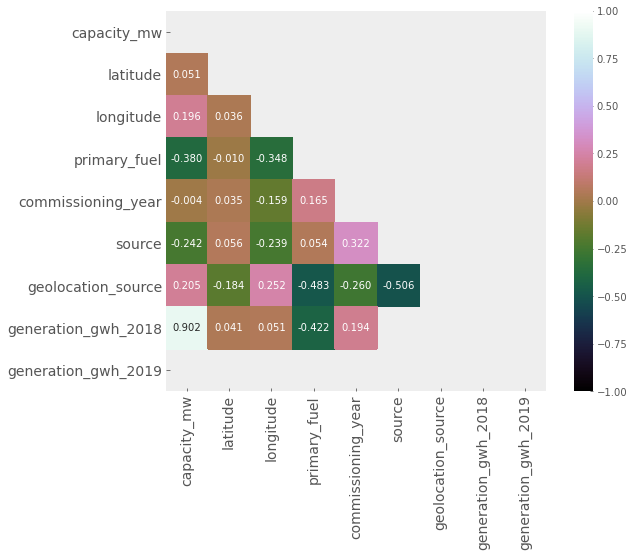

In [79]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cubehelix", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Correlation Bar Plot comparing features with our labels

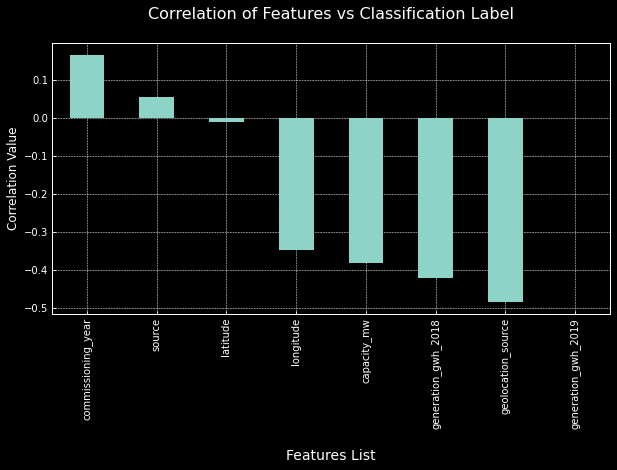

In [80]:
plt.style.use('dark_background')
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['primary_fuel'].sort_values(ascending=False).drop('primary_fuel').plot.bar()
plt.title("Correlation of Features vs Classification Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

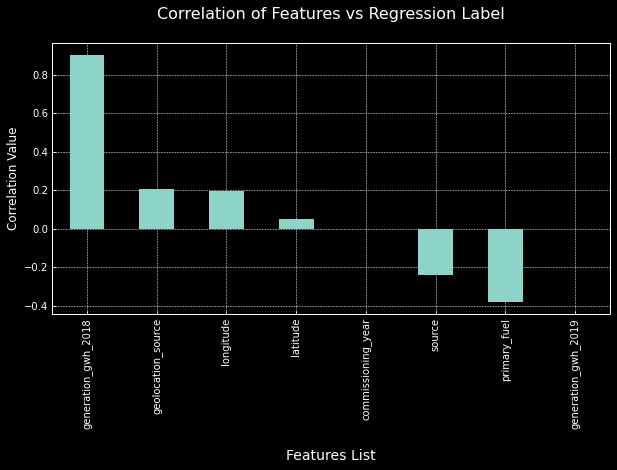

In [81]:
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['capacity_mw'].sort_values(ascending=False).drop('capacity_mw').plot.bar()
plt.title("Correlation of Features vs Regression Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and classification label

In [85]:
# X = df.drop('primary_fuel', axis=1)
X = df.drop('generation_gwh_2019', axis=1)
X = X.dropna()
Y = X['primary_fuel']
X = X.drop('primary_fuel', axis=1)
X.head(100)

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source,generation_gwh_2018
3,135.000,23.871200,91.360200,2004.0,22.0,2.0,626.239128
4,1800.000,21.960300,82.409100,2015.0,22.0,2.0,7279.000000
5,250.000,23.768900,68.644700,2005.0,22.0,2.0,976.655000
6,60.000,10.454700,77.007800,1970.0,22.0,2.0,48.327150
7,192.000,32.225800,77.207000,2010.0,22.0,2.0,579.318850
8,290.000,16.330000,75.886300,2004.0,22.0,2.0,406.377900
9,210.000,23.164200,81.637300,2008.0,22.0,2.0,1487.880000
10,1350.000,21.078200,77.900900,2014.0,22.0,2.0,3717.154000
11,134.000,31.271700,76.493800,1985.0,22.0,2.0,425.641100
12,1200.000,24.200700,82.800000,2011.0,22.0,2.0,7873.973000


Resolving the class imbalance issue in our label column

In [87]:
Y.value_counts()

1    188
3    183
2     58
5     11
4      8
Name: primary_fuel, dtype: int64

In [ ]:
# adding samples to make all the categorical label values same
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [90]:
Y.value_counts()

1    188
3    183
2     58
5     11
4      8
Name: primary_fuel, dtype: int64

# Feature Scaling

In [91]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source,generation_gwh_2018
0,-0.677981,0.327445,2.328905,0.338351,0.0,0.0,-0.458129
1,1.635714,0.035224,0.578866,0.998444,0.0,0.0,1.085413
2,-0.518176,0.311801,-2.112226,0.398360,0.0,0.0,-0.376827
3,-0.782201,-1.724247,-0.477148,-1.701936,0.0,0.0,-0.592214
4,-0.598773,1.605056,-0.438202,0.698402,0.0,0.0,-0.469015


I am using the Standard Scaler method to normalize my feature values and ensure that my regression model does not have any kind of biasness towards a particular column value.

In [92]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu,"on Random State", maxRS)

Best R2 score is 0.4654988007307582 on Random State 70


With the help of random state selection process we have found our number to be 70 amongst 1-1000

In [112]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=70)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [113]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 0.7405637749059822
R2 Score is: 46.54988007307583
Cross Validation Score: 31.423588319927585
R2 Score - Cross Validation Score is 15.126291753148248


In [114]:
# Ridge Regression

model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is: 0.7420456444328045
R2 Score is: 46.335758474386175
Cross Validation Score: 31.465449654926463
R2 Score - Cross Validation Score is 14.870308819459712


In [115]:
# Lasso Regression

model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, X, Y)

RMSE Score is: 0.8450760185057821
R2 Score is: 30.39902714505347
Cross Validation Score: 25.795007084093267
R2 Score - Cross Validation Score is 4.604020060960202


In [116]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 0.8364928072889151
R2 Score is: 31.805684114609967
Cross Validation Score: 11.329762723476792
R2 Score - Cross Validation Score is 20.475921391133177


In [117]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 0.7410242556523104
R2 Score is: 46.48338909951269
Cross Validation Score: 41.542876592844365
R2 Score - Cross Validation Score is 4.940512506668327


In [118]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 0.7281766195399896
R2 Score is: 48.323009262020435
Cross Validation Score: 41.62681186872401
R2 Score - Cross Validation Score is 6.696197393296423


In [119]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 1.2490591999401934
R2 Score is: -52.05118182641966
Cross Validation Score: -71.88004781740746
R2 Score - Cross Validation Score is 19.8288659909878


In [102]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 0.7759235749627219
R2 Score is: 38.05603713393468
Cross Validation Score: 35.706299853710206
R2 Score - Cross Validation Score is 2.349737280224474


In [103]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 0.6034123575253375
R2 Score is: 62.53812664041993
Cross Validation Score: 58.04491880917574
R2 Score - Cross Validation Score is 4.493207831244192


In [ ]:
# XGB Regressor

model=XGBRegressor()
reg(model, X, Y)

Created the all Regressor model and checked it's evaluation metrics.

# Hyper parameter tuning on the best Regression ML Model

In [105]:
# Choosing Extra Trees Regressor

fmod_param = {'criterion' : ['mse', 'mae'],
              'n_estimators' : [100, 200],
              'min_samples_split' : [2, 3],
              'random_state' : [42, 135],
              'n_jobs' : [-1, 1]
             }

In [106]:
GSCV = GridSearchCV(ExtraTreesRegressor(), fmod_param, cv=5)

In [107]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 200], 'n_jobs': [-1, 1],
                         'random_state': [42, 135]})

In [108]:
GSCV.best_params_

{'criterion': 'mae',
 'min_samples_split': 2,
 'n_estimators': 100,
 'n_jobs': -1,
 'random_state': 135}

In [109]:
Final_Model = ExtraTreesRegressor(criterion='mse', min_samples_split=3, n_estimators=100, n_jobs=-1, random_state=42)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 42.676610169491525


I have successfully incorporated the Hyper Parameter Tuning on my Final Regression Model and received the R2 score for it.

Saving the best Regression ML model

In [110]:
filename = "FinalModel_Regression_E04.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_Regression_E04.pkl']

Finally, saving best regression model using the joblib library.